# Project Objective:
- Develop a unsupervised machine learning model to detect the diabetes patience.

### Data overview:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [1]:
# import the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('assignment_excel.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,120,68.0,0,0,29.6,0.709,34.0,0
1,9,130,70.0,0,0,34.2,0.652,45.0,1
2,3,74,68.0,28,45,29.7,0.293,23.0,0
3,6,123,72.0,45,230,33.6,0.733,34.0,0
4,9,164,78.0,0,0,32.8,0.148,45.0,1


In [3]:
# Note: Cleanical datasets require a lots of cleaning and preprocessing.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               700 non-null    int64  
 1   Glucose                   700 non-null    int64  
 2   BloodPressure             688 non-null    float64
 3   SkinThickness             700 non-null    int64  
 4   Insulin                   700 non-null    int64  
 5   BMI                       688 non-null    float64
 6   DiabetesPedigreeFunction  700 non-null    float64
 7   Age                       689 non-null    float64
 8   Outcome                   700 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 49.3 KB


In [5]:
data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               12
SkinThickness                0
Insulin                      0
BMI                         12
DiabetesPedigreeFunction     0
Age                         11
Outcome                      0
dtype: int64

In [6]:
data.Outcome.value_counts(normalize=True)*100

Outcome
0    65.142857
1    34.857143
Name: proportion, dtype: float64

In [7]:
data.isnull().sum()/len(data)*100

Pregnancies                 0.000000
Glucose                     0.000000
BloodPressure               1.714286
SkinThickness               0.000000
Insulin                     0.000000
BMI                         1.714286
DiabetesPedigreeFunction    0.000000
Age                         1.571429
Outcome                     0.000000
dtype: float64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,700.000000,700.000000,688.000000,700.000000,700.000000,688.000000,700.000000,689.000000,700.000000
mean,3.907143,121.204286,69.197674,20.798571,81.135714,31.955959,0.471351,33.238026,0.348571
std,3.383661,31.691191,19.325117,15.978195,115.654696,7.943356,0.331721,11.762732,0.476859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.250000,0.370500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,129.250000,36.525000,0.624500,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# as Glucose, BloodPresure, SkinThickness, Insulin, BMI can't be zero it is because of missing value.
# lets convert all zero value into NaN missing value.

In [10]:
Misleading_data = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

In [11]:
Misleading_data.replace(0,np.nan, inplace=True)

In [12]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Misleading_data

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,700.000000,696.000000,657.000000,497.000000,363.000000,677.000000,700.000000,689.000000,700.000000
mean,3.907143,121.900862,72.462709,29.293763,156.460055,32.475185,0.471351,33.238026,0.348571
std,3.383661,30.415070,12.415896,10.508744,118.365762,6.872900,0.331721,11.762732,0.476859
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,78.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.370500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.624500,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data.isnull().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                43
SkinThickness               203
Insulin                     337
BMI                          23
DiabetesPedigreeFunction      0
Age                          11
Outcome                       0
dtype: int64

In [15]:
data.isnull().sum()/len(data)*100

Pregnancies                  0.000000
Glucose                      0.571429
BloodPressure                6.142857
SkinThickness               29.000000
Insulin                     48.142857
BMI                          3.285714
DiabetesPedigreeFunction     0.000000
Age                          1.571429
Outcome                      0.000000
dtype: float64

In [16]:
# Visulising the missing value

In [17]:
import missingno as msno

<Axes: >

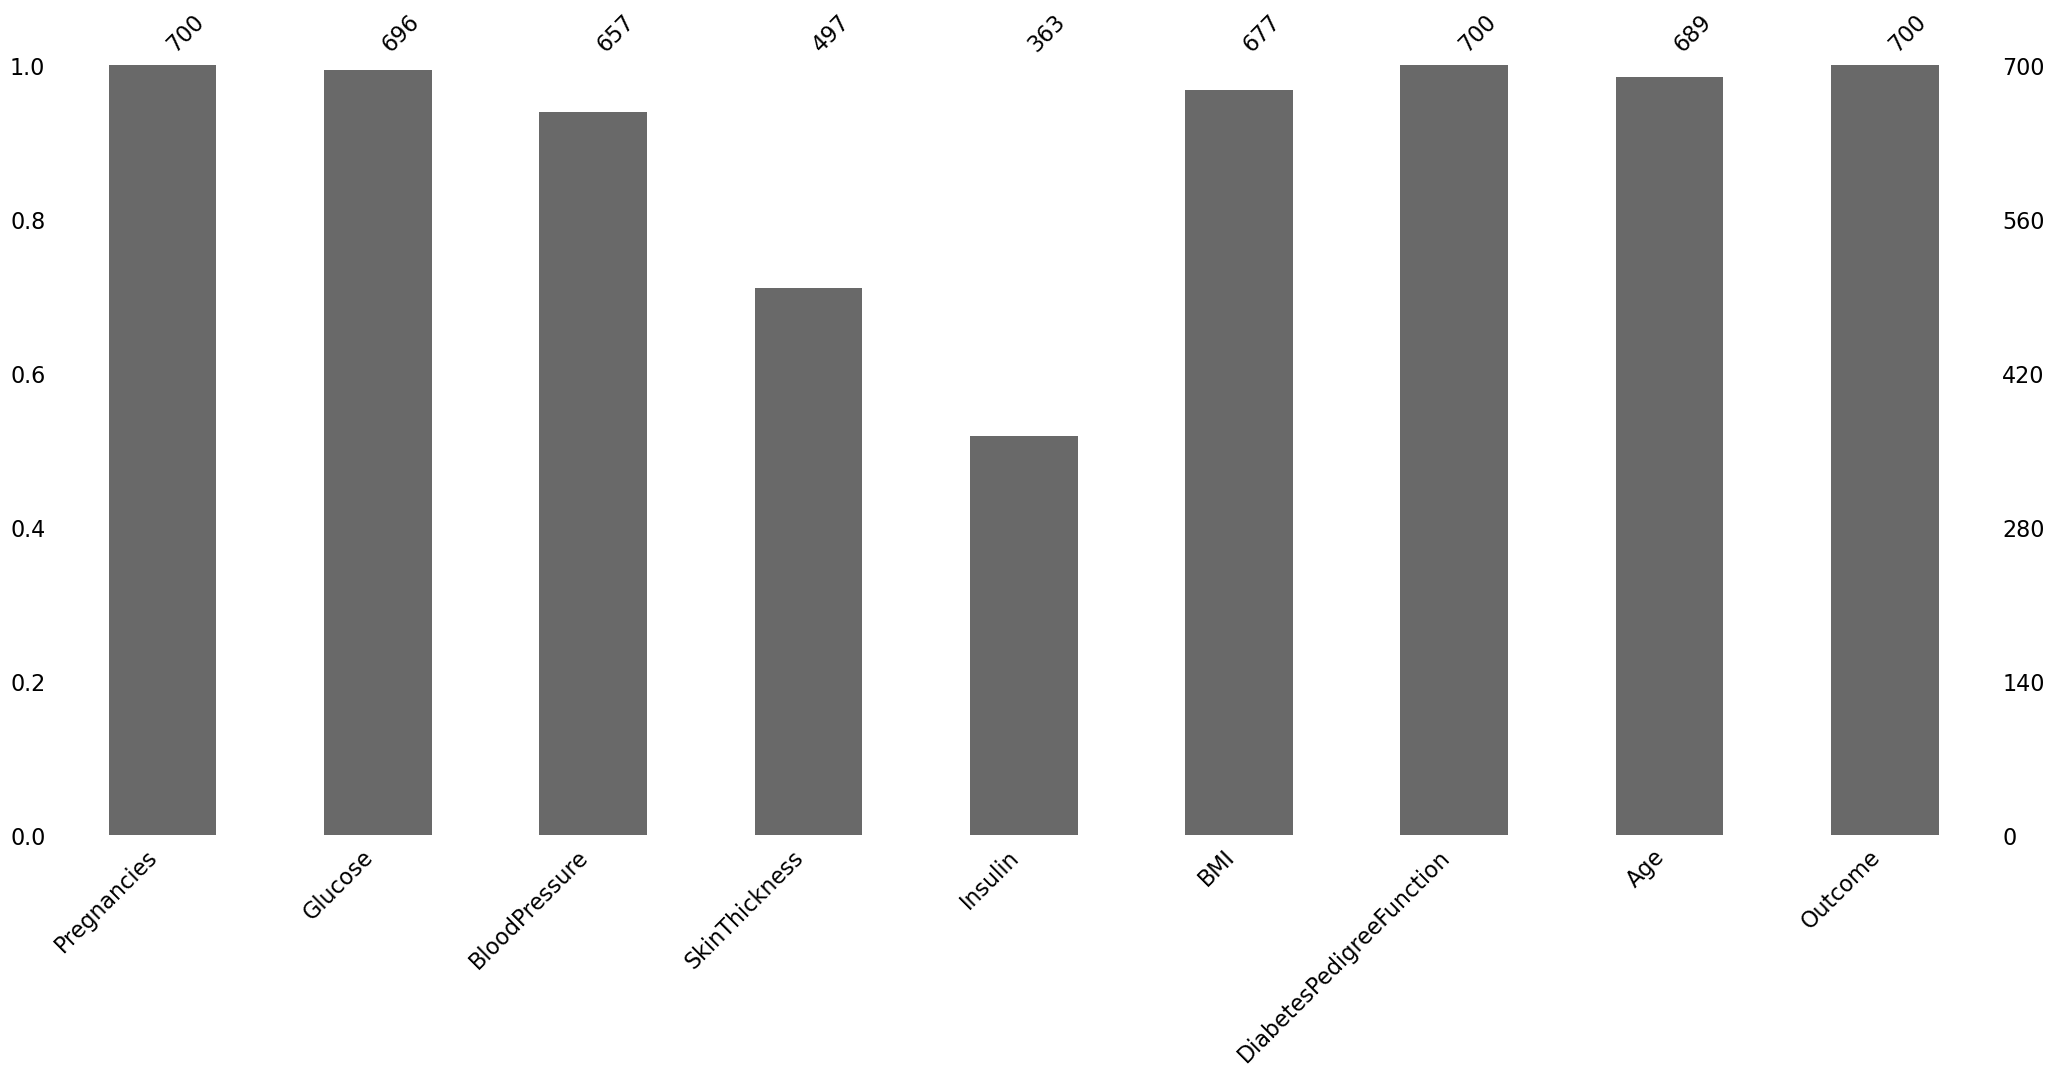

In [18]:
msno.bar(data)

<Axes: >

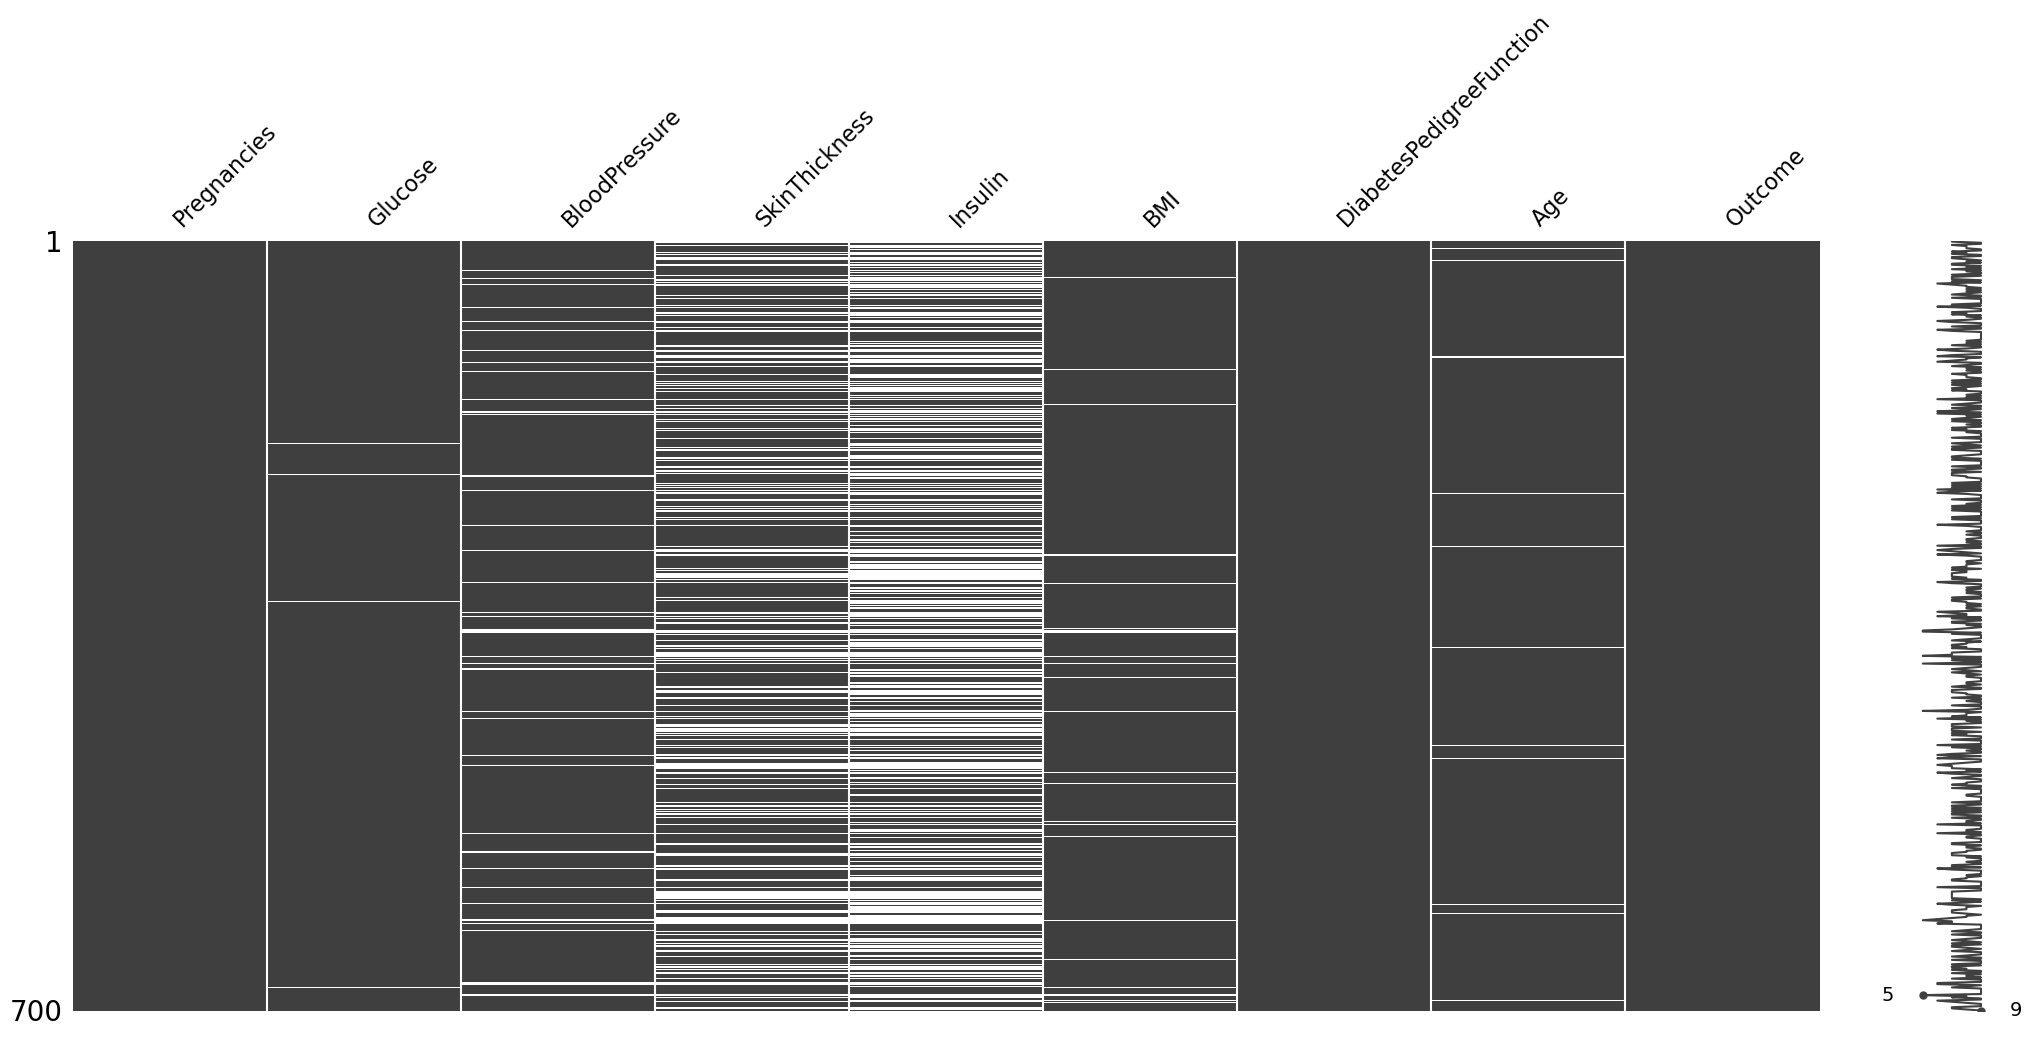

In [19]:
msno.matrix(data)

<Axes: >

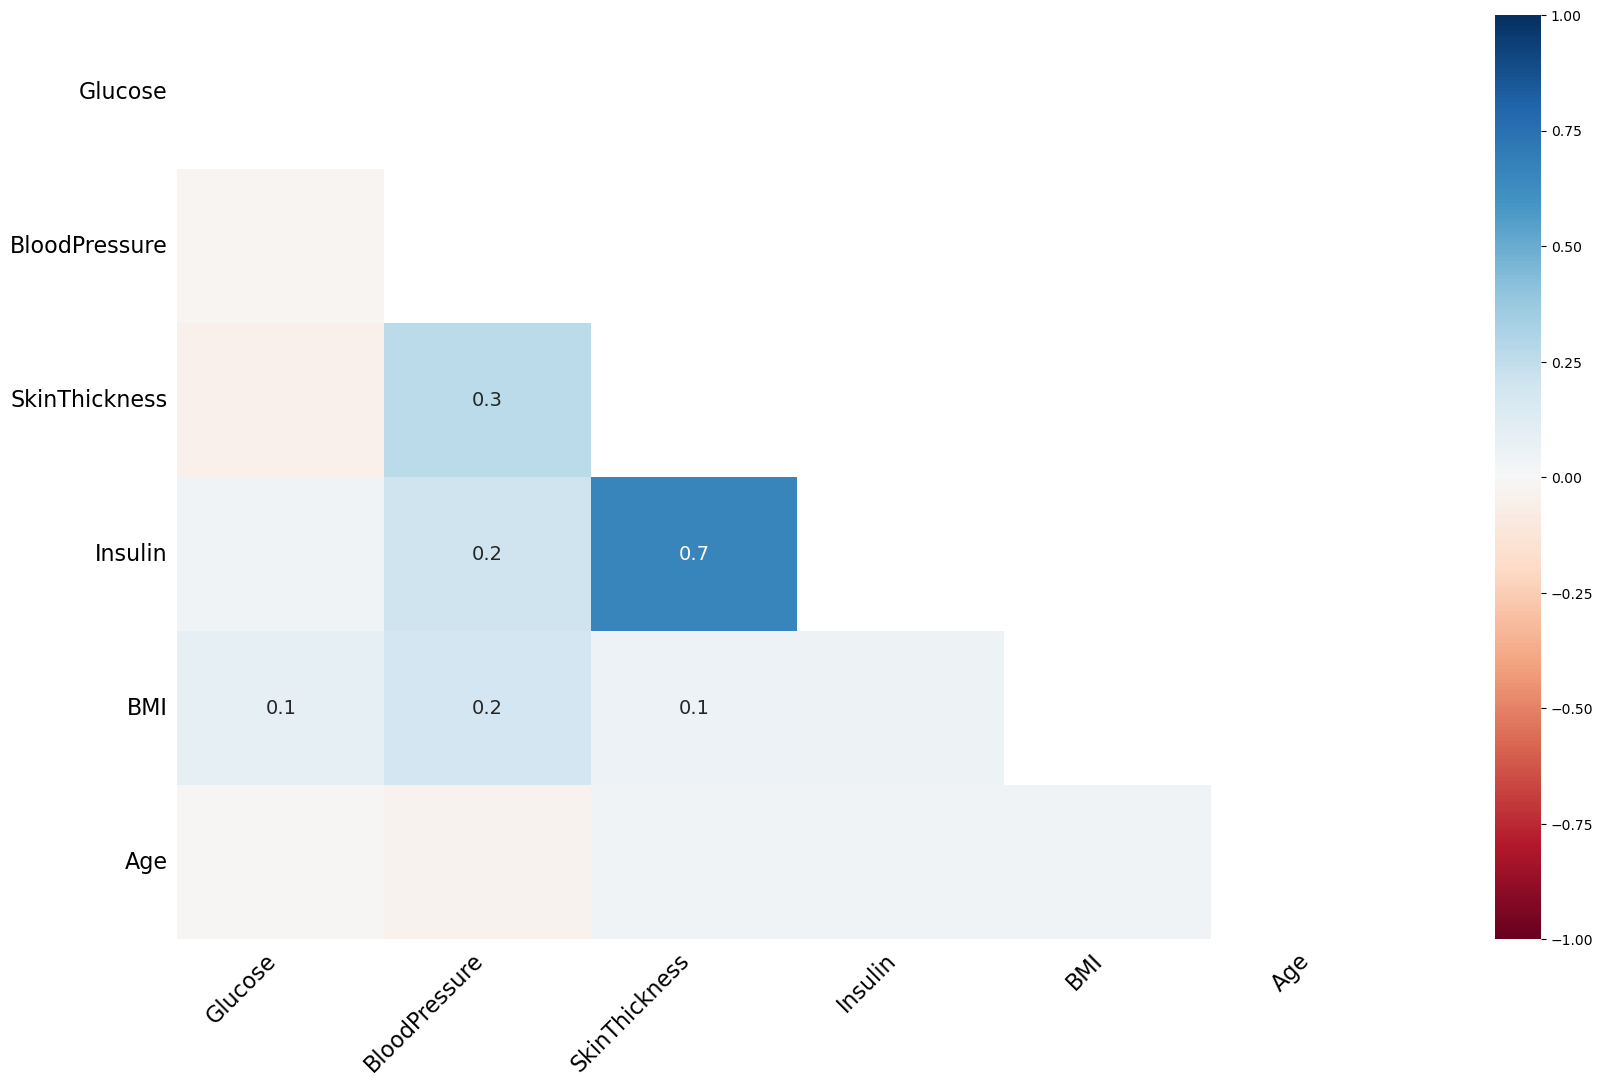

In [20]:
msno.heatmap(data)

In [21]:
# Insulin and SkinThickness are highly correlated.

In [22]:
data.dropna(subset=['Glucose','BMI'], inplace=True) # we are dropping the missing value of rows ['Glucose','BMI']

In [23]:
from sklearn.impute import KNNImputer

In [24]:
data_knn = data.copy()

In [25]:
knn_imputer = KNNImputer(n_neighbors=5)

In [26]:
data_knn.shape

(674, 9)

In [27]:
data_knn.iloc[:,:] = knn_imputer.fit_transform(data_knn)

In [28]:
data_knn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,120.0,68.0,31.4,166.4,29.6,0.709,34.0,0
1,9,130.0,70.0,34.4,117.2,34.2,0.652,45.0,1
2,3,74.0,68.0,28.0,45.0,29.7,0.293,23.0,0
3,6,123.0,72.0,45.0,230.0,33.6,0.733,34.0,0
4,9,164.0,78.0,31.8,128.0,32.8,0.148,45.0,1
...,...,...,...,...,...,...,...,...,...
695,5,109.0,62.0,41.0,129.0,35.8,0.514,25.0,1
696,5,115.0,76.0,27.4,149.4,31.2,0.343,44.0,1
697,2,91.0,62.0,20.4,60.8,27.3,0.525,22.0,0
698,11,111.0,84.0,40.0,147.0,46.8,0.925,45.0,1


In [29]:
data_knn.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
data_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,3.940653,122.265579,72.427596,29.359644,154.296142,32.474777,0.474788,33.451929,0.354599
std,3.400382,30.641518,12.218511,9.527601,98.610040,6.873803,0.331588,11.693652,0.478747
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,23.000000,91.250000,27.500000,0.246250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,132.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,35.000000,190.000000,36.600000,0.628500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
data_knn.kurt()

Pregnancies                 0.113788
Glucose                    -0.310315
BloodPressure               1.042332
SkinThickness               3.860534
Insulin                     7.839693
BMI                         1.022624
DiabetesPedigreeFunction    6.050747
Age                         0.548640
Outcome                    -1.633696
dtype: float64

In [32]:
# Now finding the outliers and giving outlier treatment.

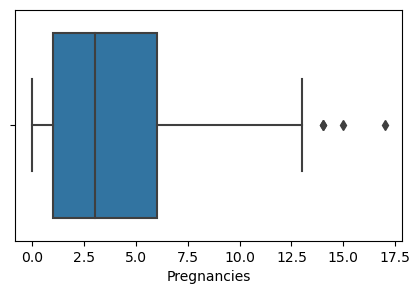

In [33]:
plt.figure(figsize=(5,3))
sns.boxplot(data_knn, x='Pregnancies')
plt.show()

In [34]:
def outlier(data):
    for i in data.columns:
        plt.figure(figsize=(5,3))
        sns.boxplot(data, x=data[i])
        plt.show()
    return sns.boxplot(data, x=data[i])

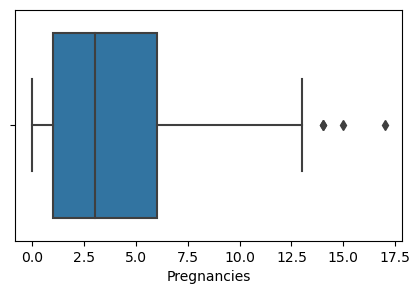

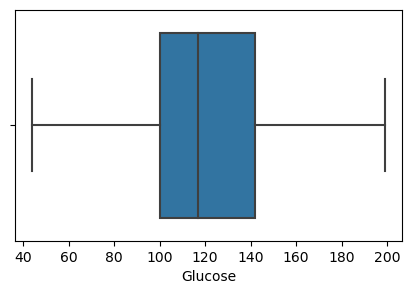

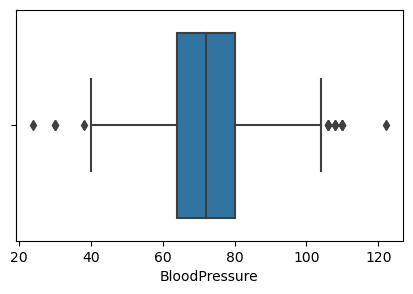

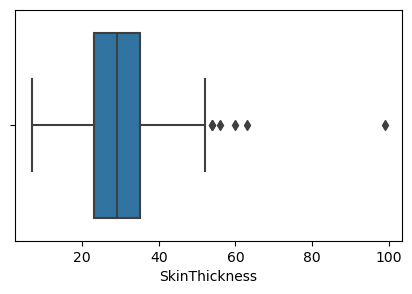

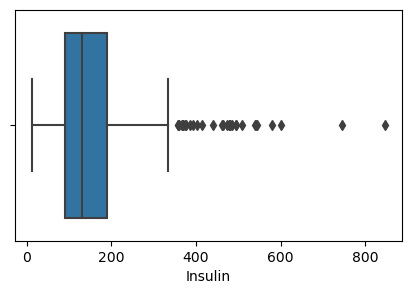

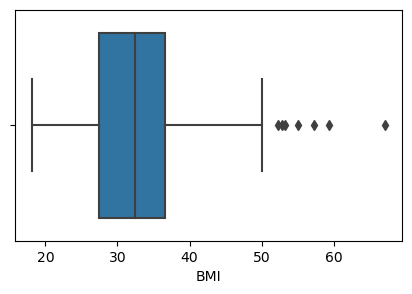

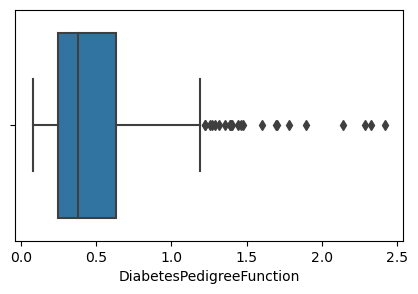

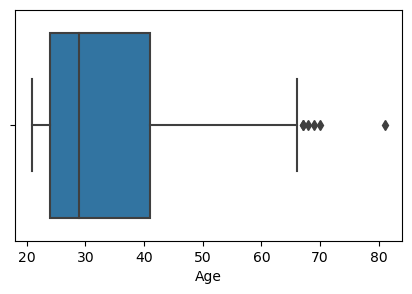

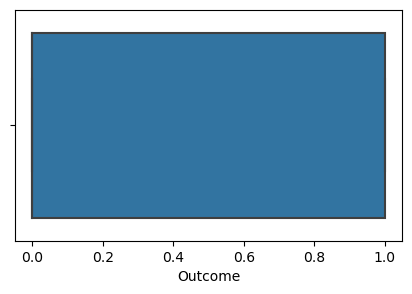

<Axes: xlabel='Outcome'>

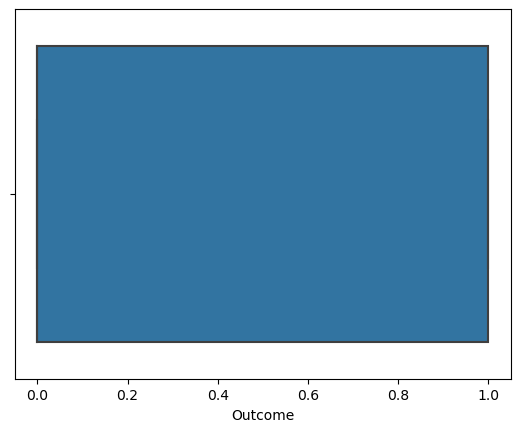

In [35]:
outlier(data_knn)

In [36]:
Clean_data = data_knn.copy()

In [37]:
# Removing the outliers using domain knowledge and boxplot outcome
Clean_data=Clean_data[Clean_data.Pregnancies<=13]

In [38]:
Clean_data=Clean_data[Clean_data.BloodPressure>=40]

In [39]:
Clean_data=Clean_data[Clean_data.SkinThickness<=80]

In [40]:
Clean_data=Clean_data[Clean_data.Insulin<=500]

In [41]:
Clean_data=Clean_data[Clean_data.BMI<=60]

In [42]:
Clean_data=Clean_data[Clean_data.Age<=70]

In [43]:
print('Data removed:',(data_knn.shape[0] - Clean_data.shape[0]))

Data removed: 19


In [44]:
Clean_data.shape

(655, 9)

<Axes: >

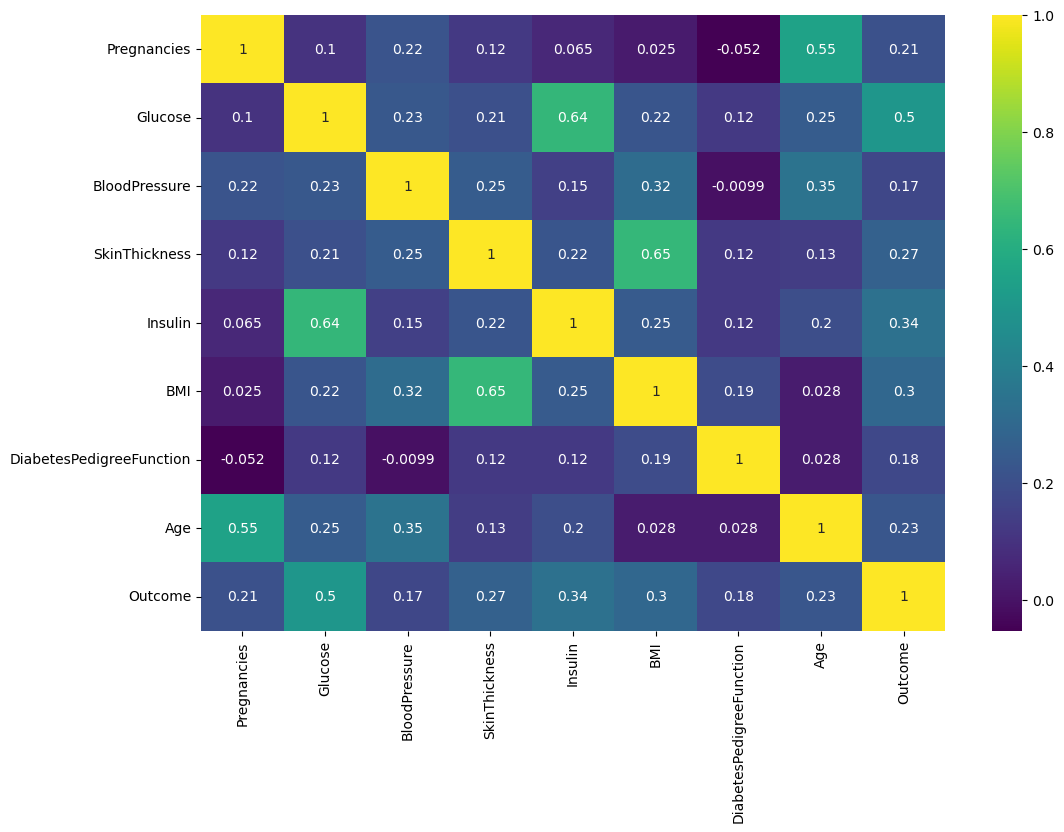

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(Clean_data.corr(), annot=True, cmap='viridis')

# Conclusion drawn from heatmap:
- there are no higher corelation among the predictor variables.
- pregnancy and age columns have linear relation as higher the age higher will be pregnancy.
- there are high correlation between BMI and SkinThkickness as people having higher BMI are having tick skin.
- there are high correlation between insulin and glucose, as patience with high glucose might have given insuline.
- there are high correlation between outcome and glucose as the patience with high glucose can have diabetes.

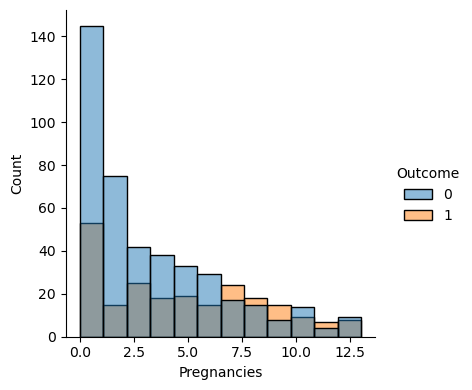

In [46]:
# plt.figure(figsize=(5,3))
sns.displot(Clean_data, x='Pregnancies', hue='Outcome', height=4)

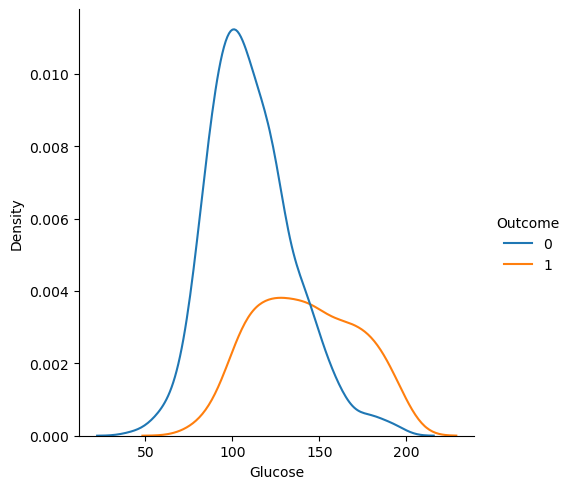

In [47]:
sns.displot(Clean_data, x='Glucose', hue='Outcome', kind ='kde' )

The people with no diabetes have glucose normally distributed, while diabetes people has higher glucose between 100 to 200.

<Axes: xlabel='Glucose', ylabel='Insulin'>

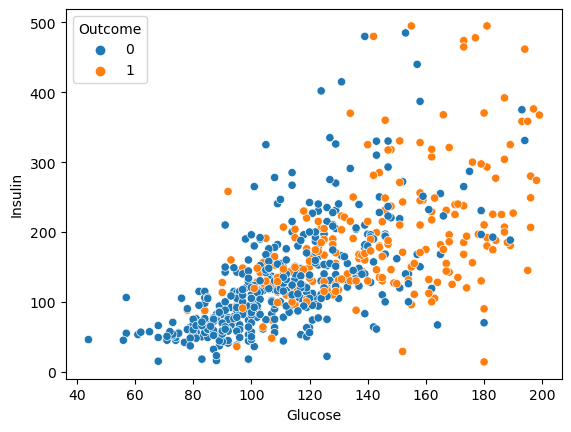

In [48]:
sns.scatterplot(Clean_data, x='Glucose', y='Insulin', hue='Outcome')

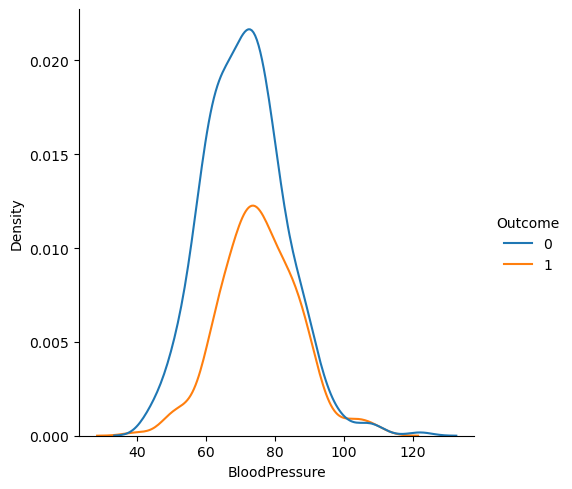

In [49]:
sns.displot(Clean_data, x='BloodPressure', hue='Outcome',kind='kde')

<Axes: xlabel='BMI', ylabel='SkinThickness'>

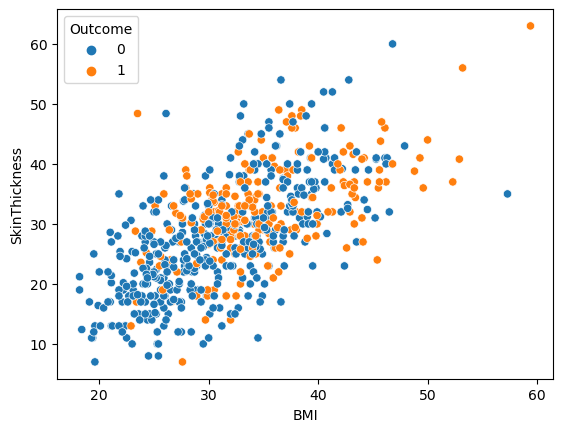

In [50]:
sns.scatterplot(data=Clean_data,y='SkinThickness',x='BMI',hue='Outcome')

# Preprocessing for model building:

In [51]:
Clean_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,120.0,68.0,31.4,166.4,29.6,0.709,34.0,0
1,9,130.0,70.0,34.4,117.2,34.2,0.652,45.0,1
2,3,74.0,68.0,28.0,45.0,29.7,0.293,23.0,0
3,6,123.0,72.0,45.0,230.0,33.6,0.733,34.0,0
4,9,164.0,78.0,31.8,128.0,32.8,0.148,45.0,1


In [52]:
df_new = Clean_data.copy()

In [53]:
# for building unsupervised machine learning model 'Outcome' is not required, we will drop the outcome variable. 

In [54]:
df_final = df_new.drop(['Outcome'], axis=1)
df_final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4,120.0,68.0,31.4,166.4,29.6,0.709,34.0
1,9,130.0,70.0,34.4,117.2,34.2,0.652,45.0
2,3,74.0,68.0,28.0,45.0,29.7,0.293,23.0
3,6,123.0,72.0,45.0,230.0,33.6,0.733,34.0
4,9,164.0,78.0,31.8,128.0,32.8,0.148,45.0


In [55]:
# for building cluster we need to apply two steps:
# 1. finding the value of 'k'
# 2. with the value of 'k' we can build the cluster. 

In [56]:
# first scaling the data using MinMaxScaler
scaler = MinMaxScaler()
df_final_scaled = scaler.fit_transform(df_final)

In [57]:
df_scaled = pd.DataFrame(df_final_scaled, columns=df_final.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.307692,0.490323,0.341463,0.435714,0.316840,0.276699,0.269428,0.265306
1,0.692308,0.554839,0.365854,0.489286,0.214553,0.388350,0.245090,0.489796
2,0.230769,0.193548,0.341463,0.375000,0.064449,0.279126,0.091802,0.040816
3,0.461538,0.509677,0.390244,0.678571,0.449064,0.373786,0.279675,0.265306
4,0.692308,0.774194,0.463415,0.442857,0.237006,0.354369,0.029889,0.489796
...,...,...,...,...,...,...,...,...
650,0.384615,0.419355,0.268293,0.607143,0.239085,0.427184,0.186166,0.081633
651,0.384615,0.458065,0.439024,0.364286,0.281497,0.315534,0.113151,0.469388
652,0.153846,0.303226,0.268293,0.239286,0.097297,0.220874,0.190863,0.020408
653,0.846154,0.432258,0.536585,0.589286,0.276507,0.694175,0.361657,0.489796


In [58]:
sse=[]
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    sse.append(km.inertia_)

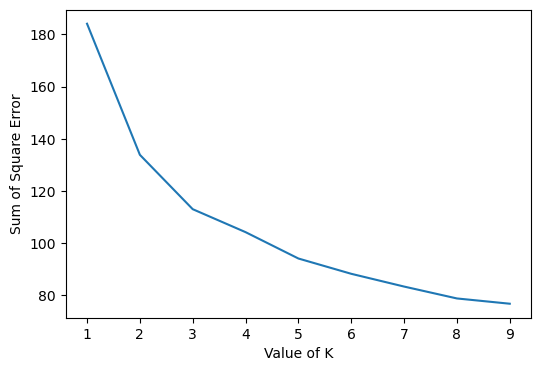

In [59]:
plt.figure(figsize=(6,4))
plt.plot(k_range,sse)
plt.xlabel('Value of K')
plt.ylabel('Sum of Square Error')
plt.show()

In [60]:
# Considering the value of k=3

In [61]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df_scaled)
df_scaled['y_pred'] = y_pred
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_pred
0,0.307692,0.490323,0.341463,0.435714,0.316840,0.276699,0.269428,0.265306,2
1,0.692308,0.554839,0.365854,0.489286,0.214553,0.388350,0.245090,0.489796,1
2,0.230769,0.193548,0.341463,0.375000,0.064449,0.279126,0.091802,0.040816,0
3,0.461538,0.509677,0.390244,0.678571,0.449064,0.373786,0.279675,0.265306,1
4,0.692308,0.774194,0.463415,0.442857,0.237006,0.354369,0.029889,0.489796,1


In [62]:
km.cluster_centers_

array([[0.17874242, 0.37494311, 0.32789191, 0.28073503, 0.17103372,
        0.23440962, 0.14355925, 0.1048861 ],
       [0.58318426, 0.5572093 , 0.45760635, 0.42589701, 0.31974085,
        0.35611876, 0.16712808, 0.50355956],
       [0.14224971, 0.59066299, 0.41934061, 0.49971285, 0.37238375,
        0.45992096, 0.20123461, 0.15290739]])

In [63]:
df_scaled['y_pred'].value_counts()

y_pred
0    241
1    215
2    199
Name: count, dtype: int64

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score(df_scaled,km.labels_)

0.5758338623294649

In [66]:
from sklearn.metrics import davies_bouldin_score

In [67]:
davies_bouldin_score(df_scaled,km.labels_)

0.7101697604013785

In [68]:
# Considering the value of k=2

In [69]:
km1 = KMeans(n_clusters=2)
y_pred1 = km1.fit_predict(df_scaled)
df_scaled['y_pred1'] = y_pred1
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_pred,y_pred1
0,0.307692,0.490323,0.341463,0.435714,0.316840,0.276699,0.269428,0.265306,2,1
1,0.692308,0.554839,0.365854,0.489286,0.214553,0.388350,0.245090,0.489796,1,1
2,0.230769,0.193548,0.341463,0.375000,0.064449,0.279126,0.091802,0.040816,0,0
3,0.461538,0.509677,0.390244,0.678571,0.449064,0.373786,0.279675,0.265306,1,1
4,0.692308,0.774194,0.463415,0.442857,0.237006,0.354369,0.029889,0.489796,1,1


In [70]:
km1.cluster_centers_

array([[1.78742419e-01, 3.74943113e-01, 3.27891914e-01, 2.80735033e-01,
        1.71033721e-01, 2.34409620e-01, 1.43559252e-01, 1.04886104e-01,
        8.88178420e-16],
       [3.71237458e-01, 5.73289699e-01, 4.39212914e-01, 4.61378537e-01,
        3.45045045e-01, 4.06014024e-01, 1.83522280e-01, 3.35009366e-01,
        1.48067633e+00]])

In [71]:
df_scaled['y_pred1'].value_counts()

y_pred1
1    414
0    241
Name: count, dtype: int64

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_score(df_scaled,km1.labels_)

0.6002505766231369

In [74]:
from sklearn.metrics import davies_bouldin_score

In [75]:
davies_bouldin_score(df_scaled,km1.labels_)

0.5655664672173791

In [76]:
df1= df_scaled['y_pred1']

In [77]:
df2 = data['Outcome']

In [78]:
print(len(df1))
print(len(df2))

655
674


In [79]:
df_nw = pd.concat([df1, df2], axis=1)

In [80]:
df_nw.head()

,y_pred1,Outcome
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,1.0,0.0
4,1.0,1.0
